In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


trade = pd.read_csv('./trade.csv') 
trade.head()



,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


In [35]:
trade.isnull().sum()

기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

### 기타사항 제거

In [36]:
trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


## 

### 모든 행에 결측치 있는 행 제거 및 확인

In [37]:
trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)

In [38]:
trade.isnull().sum()

기간      0
국가명     0
수출건수    0
수출금액    1
수입건수    0
수입금액    0
무역수지    1
dtype: int64

### 행번호 188,191,194 출력 및 확인

In [39]:
trade.loc[[188, 191, 194]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


- index 191의 수출금액 컬럼값을 이전 달과 다음 달의 평균으로 채우기

In [40]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


- index 191의 무역수지 컬럼은 수출금액과 수입금액의 차이를 이용하여 채우기

In [41]:
trade.loc[191, '무역수지'] = trade.loc[191, '수출금액'] - trade.loc[191, '수입금액'] 
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,908043.0


In [42]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

### 중복행 데이터 추출

In [43]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


## 중복행 데이터 드랍

In [44]:
trade.drop_duplicates(inplace=True)

In [45]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


### 사분위 범위수 IQR(Interquartile range)을 이용
### 이상치
### Q1−1.5∗IQR 보다 왼쪽에 있거나 Q_3 + 1.5IQRQ3+1.5∗IQR*보다 오른쪽에 있는 경우

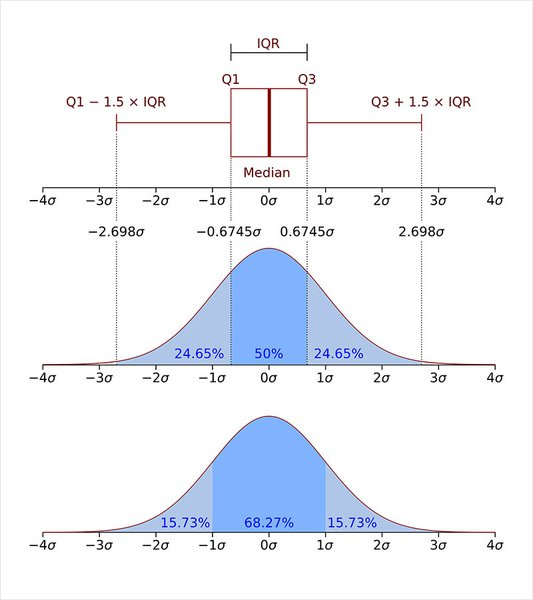

In [46]:

from IPython.display import Image
 
Image("이상치이미지.png")



In [47]:
q1=trade['무역수지'].quantile(0.25)
q2=trade['무역수지'].quantile(0.5)
q3=trade['무역수지'].quantile(0.75)
iqr=q3-q1
iqr


4365563.0

In [48]:
# trade[(trade['무역수지']<q3+1.5*iqr)&(trade['무역수지']>q3-1.5*iqr)]


# 윈저라이징을 이용한 이상치 처리

In [50]:
trade.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,117492.584615,6.559969e+06,3.842261e+05,5.563388e+06,9.965809e+05
std,74867.602790,3.948714e+06,3.038278e+05,2.009786e+06,2.343387e+06
min,48652.000000,1.696097e+06,8.087200e+04,2.998216e+06,-2.761657e+06
25%,73040.500000,2.448024e+06,1.510800e+05,3.973312e+06,-1.620432e+06
50%,84751.000000,5.942114e+06,2.800330e+05,4.731861e+06,1.330941e+06
75%,150587.500000,1.065558e+07,5.035630e+05,7.337596e+06,2.745131e+06
max,528240.000000,1.476704e+07,1.368345e+06,1.033882e+07,6.700639e+06


In [51]:
from scipy.stats.mstats import winsorize


for col in trade.columns: 
     trade[col] = winsorize(trade[col], limits=0.01)

In [52]:
trade.describe()


,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,116943.917949,6.559477e+06,3.841698e+05,5.561768e+06,9.930646e+05
std,72184.448143,3.946336e+06,3.036243e+05,2.004971e+06,2.332633e+06
min,48708.000000,1.776555e+06,8.185200e+04,3.057982e+06,-2.622691e+06
25%,73040.500000,2.448024e+06,1.510800e+05,3.973312e+06,-1.620432e+06
50%,84751.000000,5.942114e+06,2.800330e+05,4.731861e+06,1.330941e+06
75%,150587.500000,1.065558e+07,5.035630e+05,7.337596e+06,2.745131e+06
max,421194.000000,1.459053e+07,1.356388e+06,9.963108e+06,5.875989e+06
